<h1 style="color:#0B3C5D; font-size:36px; text-align:center;">
Loan Applicant Credit Risk Analysis
</h1>

<h2 style="color:#1D70A2; font-size:26px; text-align:center;">
Using K-Nearest Neighbors (KNN)
</h2>

<h2 style="color:#0B3C5D; font-size:28px;">Abstract</h2>

<p style="font-size:17px; line-height:1.6; text-align:justify;">
Credit risk analysis is a critical task for financial institutions to determine whether a loan applicant is likely to repay a loan or default. Accurate risk assessment helps banks minimize financial losses and improve lending decisions.
</p>

<p style="font-size:17px; line-height:1.6; text-align:justify;">
In this project, a machine learning-based approach is proposed for credit risk classification using the <b>K-Nearest Neighbors (KNN)</b> algorithm. The dataset contains demographic and financial attributes such as age, work experience, CIBIL score, and cost-to-request ratio. The target variable represents the number of loan repayment bounces in the past 12 months.
</p>

<p style="font-size:17px; line-height:1.6; text-align:justify;">
The project involves data inspection, preprocessing, exploratory data analysis (EDA), feature scaling, model training, and hyperparameter tuning to achieve reliable classification performance.
</p>


<h2 style="color:#0B3C5D; font-size:26px;">1. Data Import</h2>

<p style="font-size:17px; line-height:1.6;">
In this step, required Python libraries are imported and the loan applicant dataset is loaded into a DataFrame for analysis and preprocessing.
</p>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_excel("Loan_Applicant_Credit_Risk.xlsx")
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


<h2 style="color:#0B3C5D; font-size:26px;">2. Data Inspection and Handling</h2>

<p style="font-size:17px; line-height:1.6;">
This section examines the structure, data types, missing values, and statistical properties of the dataset to ensure data quality before applying machine learning techniques.
</p>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [8]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [9]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


<h2 style="color:#0B3C5D; font-size:26px;">3. Exploratory Data Analysis (EDA)</h2>

<p style="font-size:17px; line-height:1.6;">
Exploratory Data Analysis is performed to understand feature distributions, relationships between variables, and to detect potential outliers that may influence model performance.
</p>

<ul style="font-size:17px;">
<li>Relationship between age and work experience</li>
<li>Outlier detection using box plots</li>
<li>Distribution of credit scores</li>
</ul>


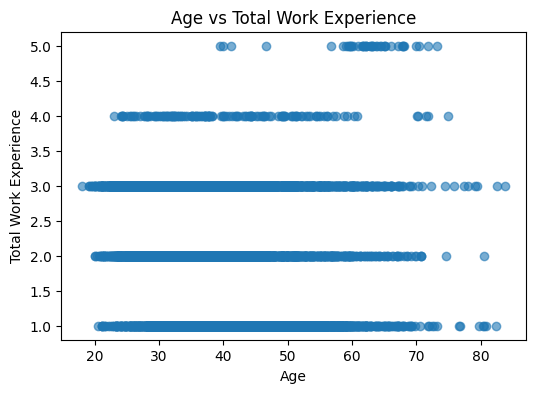

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Total Work Experience'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Total Work Experience")
plt.title("Age vs Total Work Experience")
plt.show()

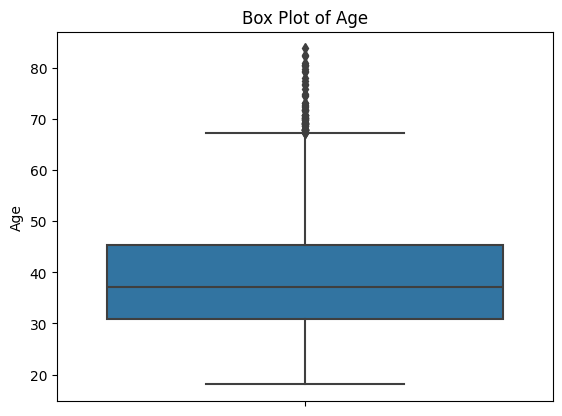

In [12]:
sns.boxplot(y=df['Age'])
plt.title("Box Plot of Age")
plt.show()

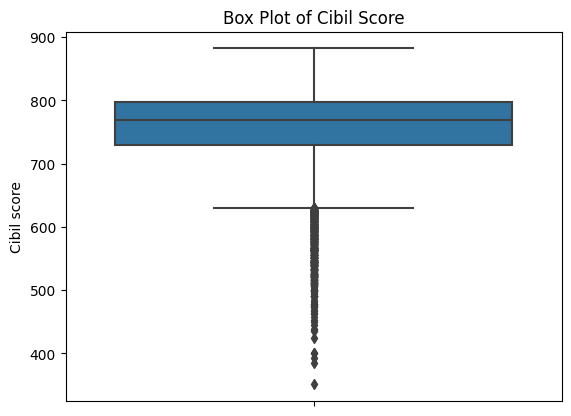

In [13]:
sns.boxplot(y=df['Cibil score'])
plt.title('Box Plot of Cibil Score')
plt.show()

<h2 style="color:#0B3C5D; font-size:26px;">4. Feature Selection and Target Variable</h2>

<p style="font-size:17px; line-height:1.6;">
The dataset is divided into independent features and a dependent target variable to prevent data leakage and ensure correct model training.
</p>

<p style="font-size:17px;">
<b>Target Variable:</b> Total Bounces in the Past 12 Months
</p>


In [15]:
X = df.drop('Total bounces past12months', axis=1)
y = df['Total bounces past12months']

<h2 style="color:#0B3C5D; font-size:26px;">5. Train–Test Split</h2>

<p style="font-size:17px; line-height:1.6;">
The dataset is split into training and testing sets to evaluate the model’s performance on unseen data.
</p>


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<h2 style="color:#0B3C5D; font-size:26px;">6. Feature Scaling</h2>

<p style="font-size:17px; line-height:1.6;">
Since KNN is a distance-based algorithm, feature scaling is essential to ensure all numerical features contribute equally to distance calculations.
</p>


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<h2 style="color:#0B3C5D; font-size:26px;">7. Machine Learning Model: KNN</h2>

<p style="font-size:17px; line-height:1.6;">
The K-Nearest Neighbors classifier is trained using an initial value of K = 5.
</p>


In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [22]:
print("Training Accuracy:", knn.score(X_train_scaled, y_train))
print("Testing Accuracy:", knn.score(X_test_scaled, y_test))

Training Accuracy: 0.7294693151497184
Testing Accuracy: 0.6807469986660738


<h2 style="color:#0B3C5D; font-size:26px;">8. Hyperparameter Tuning</h2>

<p style="font-size:17px; line-height:1.6;">
Different values of K (from 1 to 14) are tested to identify the optimal value that balances bias and variance.
</p>


In [24]:
train_accuracy = []
test_accuracy = []

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracy.append(knn.score(X_train_scaled, y_train))
    test_accuracy.append(knn.score(X_test_scaled, y_test))

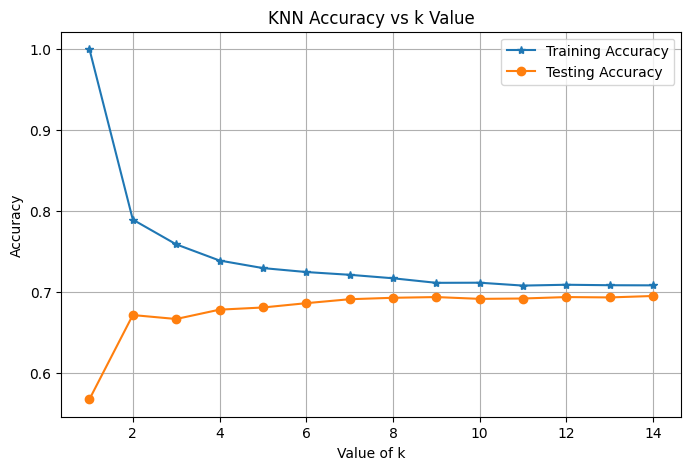

In [25]:
plt.figure(figsize=(8,5))
plt.plot(range(1,15), train_accuracy, label='Training Accuracy', marker='*')
plt.plot(range(1,15), test_accuracy, label='Testing Accuracy', marker='o')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k Value")
plt.legend()
plt.grid()
plt.show()

<h2 style="color:#0B3C5D; font-size:26px;">9. Conclusion</h2>

<ul style="font-size:17px; line-height:1.6;">
<li>KNN successfully classified loan applicants based on credit risk</li>
<li>Feature scaling significantly improved model performance</li>
<li>Hyperparameter tuning helped identify the optimal K value</li>
<li>The model can assist financial institutions in reducing loan default risk</li>
</ul>
